In [5]:
import pandas as pd

# CSV dosyasını okuma
df = pd.read_csv('e-ticaret_urun_yorumlari.csv', sep=';')  # Eğer noktalı virgül ayırıcı kullanılıyorsa

print(df.head())  # İlk birkaç satırı kontrol etmek için


                                               Metin  Durum
0                              evet anlatıldığı gibi      1
1  Daha öncede almıştım bu cihazdan ense ve sakal...      1
2  Ürün gayet başarılı sakal kesmede başlık sayıs...      1
3  Daha öncede aynısını almıştım çok güzel ve kal...      1
4  Erkek kuaförüyüm ense ve sıfır sakal traşı içi...      1


In [10]:
nltk.download('all')




[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\sevyl_26tvvn3\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\sevyl_26tvvn3\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\sevyl_26tvvn3\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\sevyl_26tvvn3\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[n

True

In [11]:
df['cleaned_text'] = df['Metin'].apply(clean_text)  # 'Metin' sütununu kullanarak temizleme işlemi yap
print(df['cleaned_text'].head())  # Temizlenmiş metni kontrol et



0                                     evet anlatıldığı
1    öncede almıştım cihazdan ense sakal tüketmek o...
2    ürün gayet başarılı sakal kesmede başlık sayıs...
3     öncede aynısını almıştım güzel kaliteli bir ürün
4    erkek kuaförüyüm ense sıfır sakal traşı uygun ...
Name: cleaned_text, dtype: object


In [13]:
print(df.columns)



Index(['Metin', 'Durum', 'cleaned_text'], dtype='object')


In [15]:
df['cleaned_text'] = df['Metin'].apply(clean_text)  # 'Metin' sütununu kullanarak temizleme işlemi yap
print(df['cleaned_text'].head())  # Temizlenmiş metni kontrol etme



0                                     evet anlatıldığı
1    öncede almıştım cihazdan ense sakal tüketmek o...
2    ürün gayet başarılı sakal kesmede başlık sayıs...
3     öncede aynısını almıştım güzel kaliteli bir ürün
4    erkek kuaförüyüm ense sıfır sakal traşı uygun ...
Name: cleaned_text, dtype: object


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Gerekli kaynakları indiriyoruz
nltk.download('punkt')
nltk.download('stopwords')

# Türkçe stopwords listesini alıyoruz
stop_words = set(stopwords.words('turkish'))

def clean_text(text):
    # Küçük harfe çevirme
    text = text.lower()
    
    # Özel karakterleri kaldırma
    text = re.sub(r'[^\w\s]', '', text)
    
    # Sayıları kaldırma
    text = re.sub(r'\d+', '', text)
    
    # Kelimelere ayırma
    word_tokens = word_tokenize(text)
    
    # Stopwords'leri ve tek karakterli kelimeleri çıkarma
    filtered_text = [word for word in word_tokens if word not in stop_words and len(word) > 1]
    
    # Filtrelenmiş kelimeleri birleştirme
    return ' '.join(filtered_text)

# Temizlenmiş metni oluşturma
df['cleaned_text'] = df['Metin'].apply(clean_text)  # 'Metin' sütununu kullanarak temizleme işlemi yap
print(df['cleaned_text'].head())  # Temizlenmiş metni kontrol etme


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sevyl_26tvvn3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sevyl_26tvvn3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                     evet anlatıldığı
1    öncede almıştım cihazdan ense sakal tüketmek o...
2    ürün gayet başarılı sakal kesmede başlık sayıs...
3     öncede aynısını almıştım güzel kaliteli bir ürün
4    erkek kuaförüyüm ense sıfır sakal traşı uygun ...
Name: cleaned_text, dtype: object


In [17]:
from sklearn.model_selection import train_test_split

# 'Durum' sütunu, duygusal etiketleri içeriyor
X = df['cleaned_text']
y = df['Durum']  # Bu sütun, duygusal etiketler

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tfidf ile metin verisini sayısal verilere dönüştürme
vectorizer = TfidfVectorizer(max_features=5000)  # max_features ile kelime sayısını sınırlıyoruz
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression modelini oluşturma
model = LogisticRegression(max_iter=1000)

# Modeli eğitme
model.fit(X_train_tfidf, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test_tfidf)

# Sonuçları değerlendirme
print(f"Modelin Doğruluk Oranı: {accuracy_score(y_test, y_pred)}")
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Modelin Doğruluk Oranı: 0.8820039551746869
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2065
           1       0.89      0.93      0.91      2051
           2       0.70      0.32      0.44       435

    accuracy                           0.88      4551
   macro avg       0.83      0.74      0.76      4551
weighted avg       0.87      0.88      0.87      4551



              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1370
           1       0.93      0.88      0.90      1384
           2       0.46      0.68      0.55       280

    accuracy                           0.87      3034
   macro avg       0.77      0.82      0.79      3034
weighted avg       0.89      0.87      0.87      3034



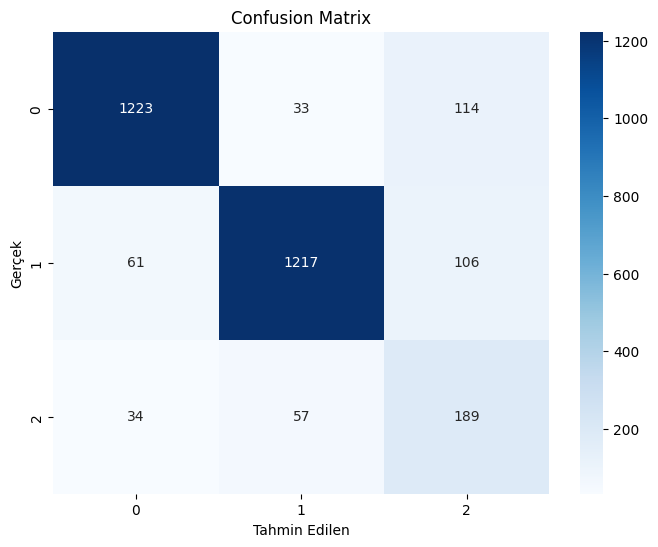

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi ayırma
X = df['cleaned_text']  # Temizlenmiş metin
y = df['Durum']  # Etiketler

# Metni vektörleştir
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Modeli sınıf ağırlıklarıyla eğitme
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Performans değerlendirmesi
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
En iyi parametreler: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1370
           1       0.91      0.92      0.92      1384
           2       0.52      0.52      0.52       280

    accuracy                           0.88      3034
   macro avg       0.79      0.79      0.79      3034
weighted avg       0.88      0.88      0.88      3034



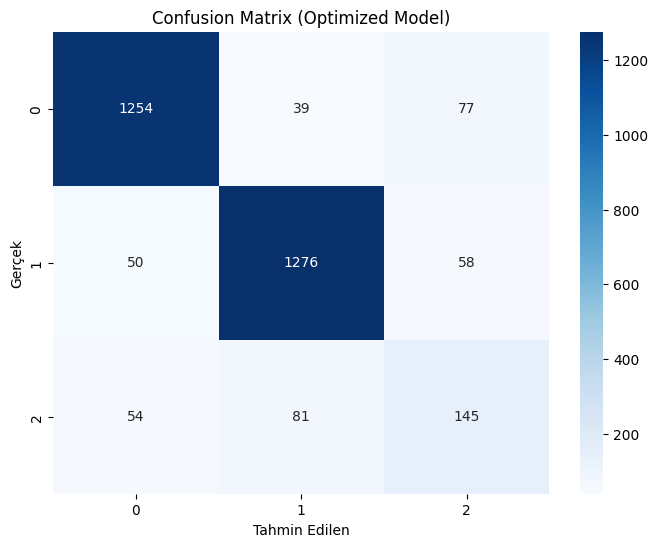

In [21]:
from sklearn.model_selection import GridSearchCV

# Parametre aralığı
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['liblinear', 'saga']
}

# GridSearchCV uygulama
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", grid_search.best_params_)

# En iyi modeli kullanarak tahmin
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Performans değerlendirmesi
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix (Optimized Model)')
plt.show()


C:\Users\sevyl_26tvvn3\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:26:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Modeli Performansı:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1370
           1       0.86      0.94      0.90      1384
           2       0.66      0.27      0.38       280

    accuracy                           0.86      3034
   macro avg       0.80      0.71      0.73      3034
weighted avg       0.85      0.86      0.85      3034

XGBoost Modeli Performansı:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1370
           1       0.89      0.90      0.89      1384
           2       0.63      0.34      0.44       280

    accuracy                           0.86      3034
   macro avg       0.79      0.72      0.74      3034
weighted avg       0.85      0.86      0.85      3034



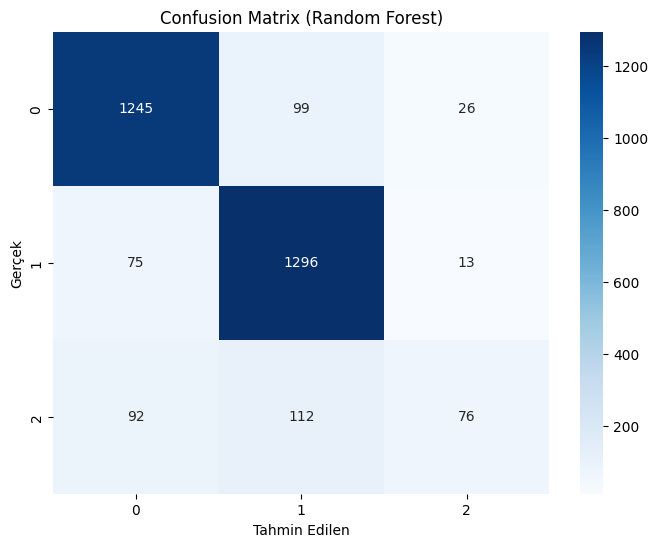

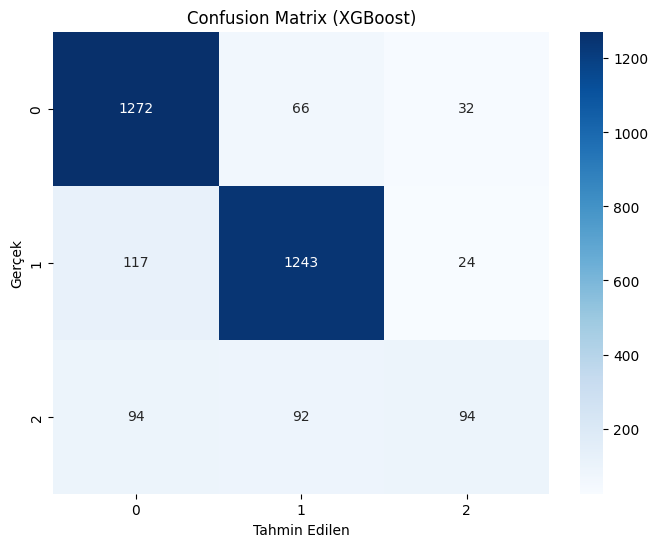

In [22]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest ve XGBoost modelleri
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss')

# Modelleri eğitme
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Tahmin yapma
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Performans değerlendirmesi
print("Random Forest Modeli Performansı:")
print(classification_report(y_test, rf_pred))
print("XGBoost Modeli Performansı:")
print(classification_report(y_test, xgb_pred))

# Confusion Matrix'leri görselleştirme
cm_rf = confusion_matrix(y_test, rf_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

# Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# XGBoost Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix (XGBoost)')
plt.show()


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Metin verisini sayısal verilere dönüştürme (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)  # Max 5000 özellik
X = vectorizer.fit_transform(df['cleaned_text']).toarray()  # Metinleri sayısal formata dönüştürme
y = df['Durum']  # Etiketler

# Eğitim ve test verisini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE ile azınlık sınıflarını dengeleme
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Modeli oluşturma ve eğitme
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_res, y_res)

# Test verisi üzerinde tahmin yapma
y_pred = rf_model.predict(X_test)

# Model performansını değerlendirme
print(classification_report(y_test, y_pred))


C:\Users\sevyl_26tvvn3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\sevyl_26tvvn3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1370
           1       0.88      0.92      0.90      1384
           2       0.53      0.54      0.53       280

    accuracy                           0.87      3034
   macro avg       0.78      0.78      0.78      3034
weighted avg       0.87      0.87      0.87      3034



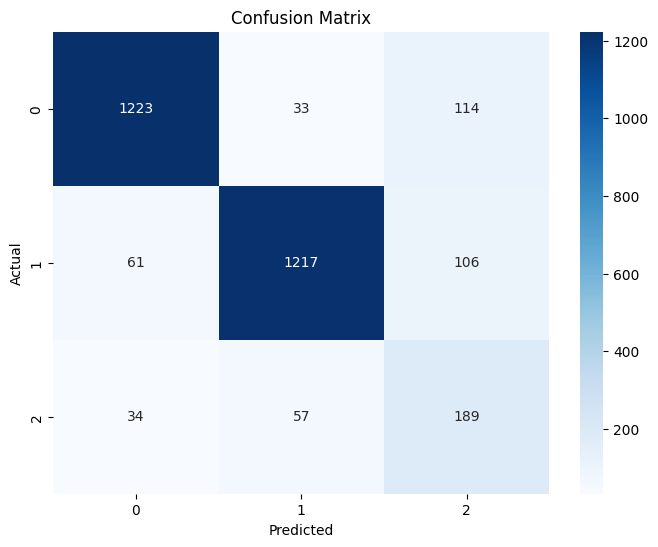

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1370
           1       0.93      0.88      0.90      1384
           2       0.46      0.68      0.55       280

    accuracy                           0.87      3034
   macro avg       0.77      0.82      0.79      3034
weighted avg       0.89      0.87      0.87      3034



In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Test verisi üzerinde tahmin yapalım
y_pred = model.predict(X_test)

# Karışıklık matrisi (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)


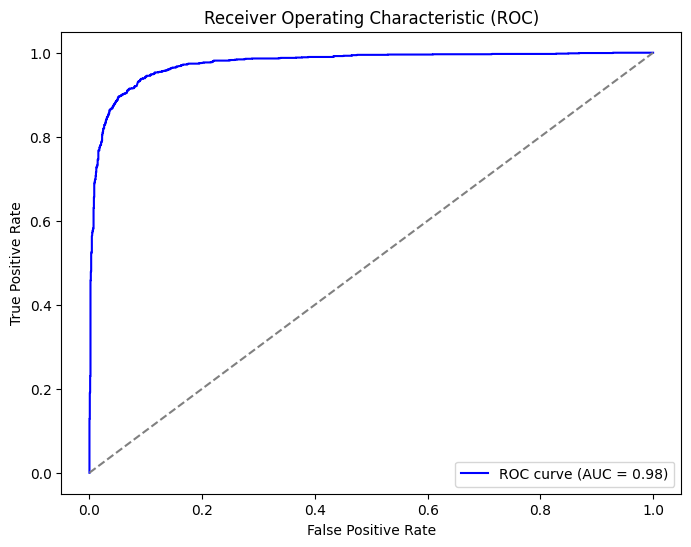

In [26]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

